# Pre-Processing Data

## Import Data
This data was collected through "Survey 1 - Rating Facebook Content Appropriateness"

In [17]:
# General Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
import math
import unicodedata

# SK Learn Libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

# Other Libraries
from astropy.table import Table
from astropy.io import ascii
from collections import Counter
from collections import OrderedDict

In [18]:
# Create Bag of Words Numpy Array
df = pd.read_csv("Data/results.csv", delimiter=",")

## Edit Data

### Drop rows that do not contain information about question responses.

Drop the first 151 rows of responses due to survey response issues that would violate research integrity.

In [19]:
# Drop Rows
drop_rows = list(range(0, 151))
df.drop(drop_rows, inplace=True)
df.reset_index(drop=True, inplace=True)

### Drop rows for responses that took less than 500 seconds to complete

In [20]:
drop_500 = []
for i in range(2, len(df.index)):
    if int(df.iloc[i, 5]) < 500: 
        drop_500.append(i)
df.drop(drop_500, inplace=True)

In [21]:
df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q30,Q31,Q33,Q34,Q35,Q36,Q37,Q39,Q40,Q40 - Topics
0,2019-03-19 08:30:37,2019-03-19 14:54:15,IP Address,*******,100,23017,True,2019-03-19 14:54:16,R_2S3q8HXZtVZzeMn,*******,...,5,3,3,2,4,4,5,No,NaN,NaN
1,2019-03-19 14:51:08,2019-03-19 14:56:47,IP Address,*******,100,338,True,2019-03-19 14:56:47,R_1ie4aIWHHJzHhX7,*******,...,4,5,1,6,7,1,1,No,NaN,NaN
2,2019-03-19 15:05:12,2019-03-19 15:13:50,IP Address,*******,100,518,True,2019-03-19 15:13:51,R_4YZDPcdbRnogIEx,*******,...,3,5,5,3,3,6,2,No,NaN,NaN
4,2019-03-19 14:53:38,2019-03-19 15:16:50,IP Address,*******,100,1392,True,2019-03-19 15:16:51,R_1Ih1OKCsx4Uq6K7,*******,...,4,3,5,2,3,4,4,Yes,https://m.facebook.com/mara.harwin?tsid=0.3064...,Unknown
6,2019-03-19 15:14:34,2019-03-19 15:28:44,IP Address,*******,100,849,True,2019-03-19 15:28:45,R_yqhMS4maSLG1IHf,*******,...,4,4,1,7,4,NaN,1,Yes,https://www.facebook.com/slumdawg.millieonaire,Unknown
8,2019-03-19 14:34:16,2019-03-19 15:56:41,IP Address,*******,100,4945,True,2019-03-19 15:56:42,R_3D0Zaoc3WhglNBb,*******,...,1,1,1,4,4,1,1,Yes,https://www.facebook.com/jack.wolfgramm.9,Unknown
9,2019-03-19 15:57:34,2019-03-19 16:16:17,IP Address,*******,100,1122,True,2019-03-19 16:16:17,R_3nv1w5ooZ8hFXgV,*******,...,5,5,2,6,6,2,3,No,NaN,NaN
10,2019-03-19 16:05:37,2019-03-19 16:18:06,IP Address,*******,100,748,True,2019-03-19 16:18:07,R_puzts7jVSuE3MJj,*******,...,3,3,3,5,3,5,5,Yes,NaN,NaN
11,2019-03-19 16:09:19,2019-03-19 16:24:42,IP Address,*******,100,922,True,2019-03-19 16:24:42,R_2xWrnFG6COuoeQn,*******,...,3,4,1,3,5,1,3,No,NaN,NaN
12,2019-03-19 13:42:20,2019-03-19 16:31:18,IP Address,*******,100,10138,True,2019-03-19 16:31:19,R_3r0pFO6jibPWAwg,*******,...,4,5,4,4,5,4,4,No,NaN,NaN


### Restructure data

In [22]:
# Export edited data 
df.to_csv('Data/results_edited_dropped_500.csv', index=False)

In [23]:
# Drop Columns
df = pd.read_csv("Data/results_edited_dropped_500.csv", delimiter=",")
drop_columns = ['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress', 'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId', 'RecipientLastName', 'RecipientFirstName', 'RecipientEmail', 'ExternalReference', 'LocationLatitude', 'LocationLongitude', 'DistributionChannel', 'UserLanguage', 'Q39', 'Q40', 'Q40 - Topics', 'Q41']
df = df.drop(columns=drop_columns, axis=1)
df.shape

(271, 25)

### Replace remaining NaNs

In [24]:
# Replace NaN's with the mode
# df = df.fillna(df.mode().iloc[0])
df.dropna(inplace=True)
df

,Q3,Q4,Q5,Q6,Q7,Q10,Q12,Q14,Q16,Q18,...,Q27,Q28,Q29,Q30,Q31,Q33,Q34,Q35,Q36,Q37
0,2.0,1.0,3.0,5.0,2.0,2.0,4.0,6.0,3.0,3.0,...,3.0,2.0,4.0,5.0,3.0,3.0,2.0,4.0,4.0,5.0
1,1.0,6.0,1.0,2.0,1.0,5.0,2.0,1.0,1.0,2.0,...,1.0,7.0,6.0,4.0,5.0,1.0,6.0,7.0,1.0,1.0
2,5.0,7.0,6.0,1.0,5.0,7.0,3.0,3.0,2.0,5.0,...,2.0,7.0,4.0,3.0,5.0,5.0,3.0,3.0,6.0,2.0
3,1.0,2.0,4.0,1.0,6.0,6.0,3.0,1.0,2.0,5.0,...,1.0,6.0,5.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0
5,7.0,7.0,2.0,1.0,4.0,3.0,1.0,3.0,2.0,2.0,...,1.0,7.0,7.0,1.0,1.0,1.0,4.0,4.0,1.0,1.0
6,5.0,6.0,4.0,2.0,3.0,4.0,2.0,2.0,3.0,5.0,...,3.0,7.0,5.0,5.0,5.0,2.0,6.0,6.0,2.0,3.0
7,5.0,7.0,5.0,1.0,5.0,5.0,3.0,3.0,3.0,6.0,...,1.0,3.0,2.0,3.0,3.0,3.0,5.0,3.0,5.0,5.0
8,3.0,4.0,1.0,1.0,2.0,6.0,2.0,2.0,2.0,6.0,...,1.0,7.0,5.0,3.0,4.0,1.0,3.0,5.0,1.0,3.0
9,4.0,6.0,4.0,4.0,5.0,5.0,3.0,2.0,2.0,4.0,...,3.0,6.0,7.0,4.0,5.0,4.0,4.0,5.0,4.0,4.0
10,4.0,6.0,2.0,1.0,2.0,5.0,1.0,2.0,1.0,4.0,...,1.0,6.0,5.0,5.0,5.0,3.0,5.0,3.0,2.0,3.0


In [25]:
# Export edited data 
df.to_csv('Data/results_no_metadata_dropped_500.csv', index=False)

In [26]:
# Convert all data to integers
df = pd.read_csv("Data/results_no_metadata_dropped_500.csv", delimiter=",", dtype=int)
response_numbers = len(df)
df = df.transpose()
index = df.index.values
df.shape

(25, 238)

### Isolate Community Standards

In [27]:
def isolate_data(a, b):
    data = df.iloc[a:b]
    return data, data.index.values

In [28]:
hate, hate_index = isolate_data(0, 5)
nudity, nudity_index = isolate_data(5, 10)
cruel, cruel_index = isolate_data(10, 15)
spam, spam_index = isolate_data(15, 20)
false, false_index = isolate_data(20, 25)

## Analyze Data

### Means and Variances

In [29]:
# Define function for getting means and variances
def get_stat(data):
    means = []
    sds = []    
    for i in range(len(data)):
        m = np.round(np.mean(data.iloc[i]), decimals=4)
        sd = np.round(np.std(data.iloc[i]), decimals=4)
        means.append(m)
        sds.append(sd) 
    return means, sds

In [30]:
# Get means and standard deviations for overall dataset
means, sds = get_stat(df)   

# Get means and standard deviations for each Community Standard
hate_means, hate_sds = get_stat(hate)
nudity_means, nudity_sds = get_stat(nudity)
cruel_means, cruel_sds = get_stat(cruel)
spam_means, spam_sds = get_stat(spam)
false_means, false_sds = get_stat(false)

#for i in range(len(index)):
    #print('%s: means=%.2f sd=%.2f' %(index[i], means[i], sds[i]))

### Figures for Means and Variances

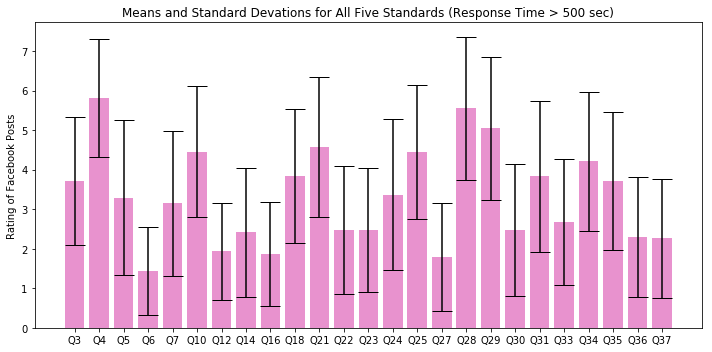

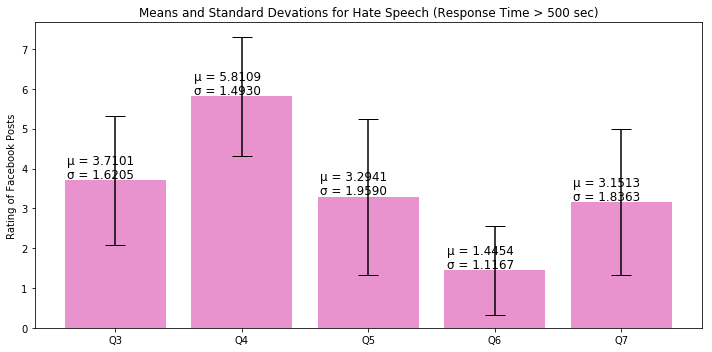

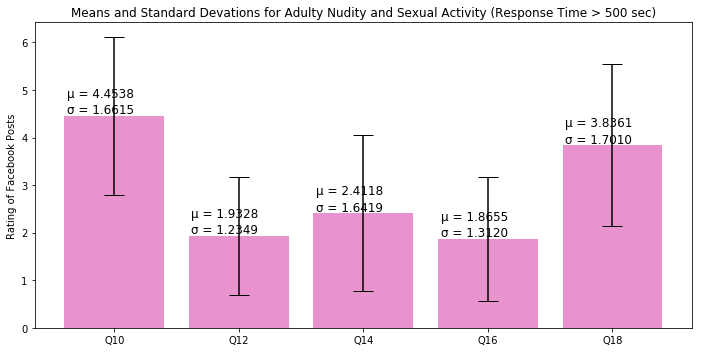

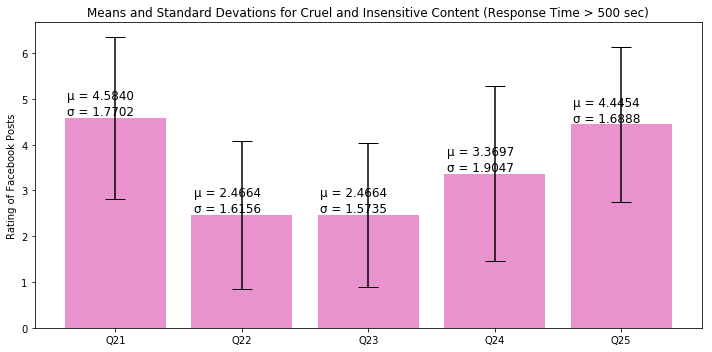

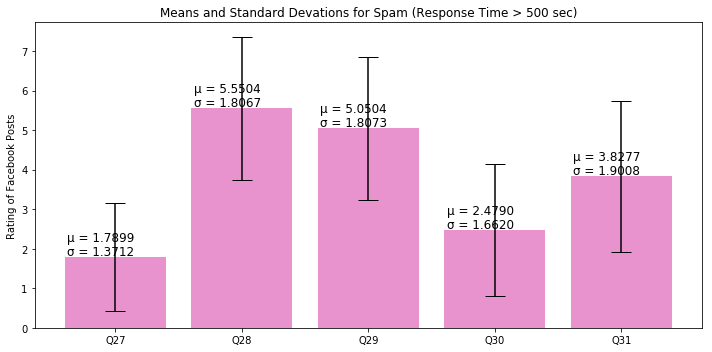

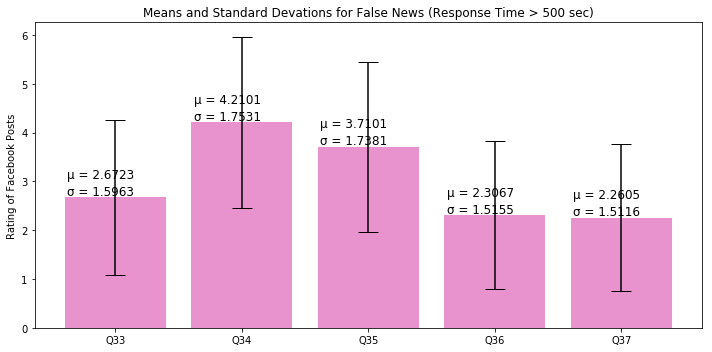

In [49]:
mu = unicodedata.lookup("GREEK SMALL LETTER MU")
sigma = unicodedata.lookup("GREEK SMALL LETTER SIGMA")

# Define function to create bar graph with error bars   
def plot_figs_no_stats(index, means, sds, standard, file_name):
    fig = plt.figure(figsize=(10,5))
    plt.bar(index, means, yerr=sds, align='center', alpha=0.8, ecolor='black', capsize=10, color='tab:pink')
    plt.ylabel('Rating of Facebook Posts')
    plt.xticks(index)
    plt.title('Means and Standard Devations for %s (Response Time > 500 sec)' % standard)
    plt.tight_layout()
    plt.savefig('Figures_dropped_500/%s_bar_plot_with_error_bars_dropped_500.png' % file_name, overwrite=True)
    plt.show()
    
# Define function to create bar graph with error bars and statistics on top of bars
def plot_figs(index, means, sds, standard, file_name):
    fig = plt.figure(figsize=(10,5))
    plt.bar(index, means, yerr=sds, align='center', alpha=0.8, ecolor='black', capsize=10, color='tab:pink')
    plt.ylabel('Rating of Facebook Posts')
    plt.xticks(index)
    plt.title('Means and Standard Devations for %s (Response Time > 500 sec)' % standard)
    plt.tight_layout()
    bar_spacing = list(range(0, len(index), 1))
    for i in range(len(bar_spacing)):
        plt.text(x = bar_spacing[i]-0.38, y = means[i]+0.4, s = ('%s = %.4f' % (mu, means[i])), size = 12)
        plt.text(x = bar_spacing[i]-0.38, y = means[i]+0.05, s = ('%s = %.4f' % (sigma, sds[i])), size = 12)
    plt.savefig('Figures_dropped_500/%s_bar_plot_with_error_bars_dropped_500.png' % file_name, overwrite=True)
    plt.show()

# Plot and save figures
plot_figs_no_stats(index, means, sds, 'All Five Standards', 'all')  
plot_figs(hate_index, hate_means, hate_sds, 'Hate Speech', 'hate')
plot_figs(nudity_index, nudity_means, nudity_sds, 'Adulty Nudity and Sexual Activity', 'nudity')
plot_figs(cruel_index, cruel_means, cruel_sds, 'Cruel and Insensitive Content', 'cruel')
plot_figs(spam_index, spam_means, spam_sds, 'Spam', 'spam')
plot_figs(false_index, false_means, false_sds, 'False News', 'false')

In [ ]:
def create_stat_charts(index, means, sds, standard, file_name):
    t = Table([index, means, sds], names=('index', 'means', 'sds'), meta={'name': 'Table on Survey 1 %s Means and Variances (Response Time > 500 seconds)' % file_name})
    ascii.write(t, 'Tables_dropped_500/table_of_%s_means_sds_dropped_500.csv' % file_name, format='csv', fast_writer=False, overwrite=True)
    print(t)
# Create charts with means and variances
create_stat_charts(index, means, sds, 'All', 'all')
create_stat_charts(hate_index, hate_means, hate_sds, 'Hate Speech', 'hate')
create_stat_charts(nudity_index, nudity_means, nudity_sds, 'Adult Nudity and Sexual Activity', 'nudity')
create_stat_charts(cruel_index, cruel_means, cruel_sds, 'Cruel and Insensitive Speech', 'cruel')
create_stat_charts(spam_index, spam_means, spam_sds, 'Spam', 'spam')
create_stat_charts(false_index, false_means, false_sds, 'False News', 'false')

### Bar Graphs for Each Question

In [ ]:
def get_counts(data):
    prev = 0
    final_counts = []
    counts = Counter(data.iloc[0])
    counts = OrderedDict(sorted(counts.items()))
    for key, value in counts.items():
        if key-1 != prev:
            final_counts.append(0)
        prev = key
        final_counts.append(value)
    return final_counts

def graph(data):
    for i in range(25):
        data, index = isolate_data(i, i+1)
        counts = get_counts(data)
        bar_spacing = list(range(1, 8, 1))
        plt.bar(bar_spacing, counts, width=0.75, color='tab:pink')
        for j in range(7):
            plt.text(x=bar_spacing[j]-0.2, y=counts[j]+6, s=counts[j], fontsize=12)
        plt.xlabel('Rankings', fontsize=14)
        plt.ylabel('Frequencies', fontsize=14)
        plt.title('Rankings for Survey %s (Response Time > 500 Seconds)' % index[0], fontsize=14)
        plt.text(3, 330,'Number of Responses = %i' % response_numbers, fontsize=14)
        plt.text(5, 300,'mean = %.4f' % means[i], fontsize=14)
        plt.text(5, 270,'sd = %.4f' % sds[i], fontsize=14)
        plt.axis([0, 8, 0, 350])
        plt.grid(True, ls="-", color='0.8')
        plt.savefig('Figures_dropped_500/%s_ranking_bar_plot_dropped_500.png' % index[0], overwrite=True)
        plt.show()
        
graph(df)